# CIS 419/519 
#**Homework 3 : Logistic Regression**

In [538]:
import pandas as pd
import numpy as np


### Logistic Regression

In [539]:
class LogisticRegression:

    def __init__(self, alpha = 0.01, regLambda=0.01, regNorm=2, epsilon=0.0001, maxNumIters = 10000, initTheta = None):
        '''
        Constructor
        Arguments:
        	alpha is the learning rate
        	regLambda is the regularization parameter
        	regNorm is the type of regularization (either L1 or L2, denoted by a 1 or a 2)
        	epsilon is the convergence parameter
        	maxNumIters is the maximum number of iterations to run
          initTheta is the initial theta value. This is an optional argument
        '''
        self.alpha = alpha
        self.regLambda = regLambda
        self.regNorm = regNorm
        self.epsilon = epsilon
        self.maxNumIters = maxNumIters
        self.theta = initTheta
        self.costList = []
    

    def computeCost(self, theta, X, y, regLambda):
        '''
        Computes the objective function
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-by-1 numpy matrix
            regLambda is the scalar regularization constant
        Returns:
            a scalar value of the cost  ** make certain you're not returning a 1 x 1 matrix! **
        '''
        h_theta = self.sigmoid(np.dot(X, theta))
        h_theta = np.array(h_theta)
        cost = -(np.dot(y.T, np.log(h_theta)) + np.dot((1 - y).T, np.log(1 - h_theta)))
        if self.regNorm is 1:
            regCost = regLambda * sum(abs(theta))
        if self.regNorm is 2:
            regCost = regLambda * ((np.linalg.norm(theta)) ** 2)
        return cost + regCost

    
    
    def computeGradient(self, theta, X, y, regLambda):
        '''
        Computes the gradient of the objective function
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-by-1 numpy matrix
            regLambda is the scalar regularization constant
        Returns:
            the gradient, an d-dimensional vector
        '''
        h_theta = self.sigmoid(np.dot(X, theta))
        n, d = X.shape
        gradient = np.zeros((d,1))
        h_theta = np.array(h_theta)
        gradient[0,0] = sum(h_theta - y) # no regularization for the x_i0
        for j in range(d-1):
            if self.regNorm is 1:
                gradient[j+1,0] = np.dot(X[:,j+1].reshape((1,n)), (h_theta - y)) + regLambda * ( theta[j+1, 0] / abs(theta[j+1, 0]) )
            if self.regNorm is 2:
                gradient[j+1,0] = np.dot(X[:,j+1].reshape((1,n)), (h_theta - y)) + regLambda * theta[j+1, 0]
        return gradient
        

    def fit(self, X, y):
        '''
        Trains the model
        Arguments:
            X is a n-by-d Pandas data frame
            y is an n-by-1 Pandas data frame
        Note:
            Don't assume that X contains the x_i0 = 1 constant feature.
            Standardization should be optionally done before fit() is called.
        '''
        n = len(y)
        X = X.to_numpy()
        X = np.c_[np.ones((n, 1)), X]
        
        n, d = X.shape
        y = y.to_numpy()
        y = y.reshape(n, 1)
        
        # start doing gradient descent
        if self.theta is None:
            self.theta = np.matrix(np.zeros((d,1))) #np.zeros(d)
        
        
        count = 0
        self.costList.append((None, 100)) # assign a large dummy theta and assign None to cost as the starter 
        while self.hasConverged(self.theta, self.costList[count][1]):
            self.costList.append( (self.computeCost(self.theta, X, y, self.regLambda), self.theta) )
            count = count + 1
            print("Iteration: ", count, " Cost: ", self.costList[count][0], " Theta.T: ", self.theta.T)
            self.theta = self.theta - self.alpha * self.computeGradient(self.theta, X, y, self.regLambda)
            if count is self.maxNumIters:
                break
            


    def predict(self, X):
        '''
        Used the model to predict values for each instance in X
        Arguments:
            X is a n-by-d Pandas data frame
        Returns:
            an n-by-1 dimensional Pandas data frame of the predictions
        Note:
            Don't assume that X contains the x_i0 = 1 constant feature.
            Standardization should be optionally done before predict() is called.
        '''
        prob = self.predict_proba(X)
        label = (prob >= 0.5)
        return label

    def predict_proba(self, X):
        '''
        Used the model to predict the class probability for each instance in X
        Arguments:
            X is a n-by-d Pandas data frame
        Returns:
            an n-by-1 Pandas data frame of the class probabilities
        Note:
            Don't assume that X contains the x_i0 = 1 constant feature.
            Standardization should be optionally done before predict_proba() is called.
        '''
        n, d = X.shape
        X = X.to_numpy()
        X = np.c_[np.ones((n, 1)), X]
        prob = pd.DataFrame(self.sigmoid(np.dot(X, self.theta)))
        return prob
    
    def hasConverged(self, theta, prevTheta):
        running_epsilon = np.linalg.norm( theta - prevTheta)
        print('The convergence now is: ', running_epsilon)
        return (running_epsilon > self.epsilon)


    def sigmoid(self, Z):
        '''
        Computes the sigmoid function 1/(1+exp(-z))
        '''
        return 1/(1 + np.exp(-Z))

# Test Logistic Regression 1

In [479]:
# Test script for training a logistic regressiom model
#
# This code should run successfully without changes if your implementation is correct
#
from numpy import loadtxt, ones, zeros, where
import numpy as np
from pylab import plot,legend,show,where,scatter,xlabel, ylabel,linspace,contour,title
import matplotlib.pyplot as plt

def test_logreg1():
    # load the data
    filepath = "http://www.seas.upenn.edu/~cis519/spring2020/data/hw3-data1.csv"
    df = pd.read_csv(filepath, header=None)

    X = df[df.columns[0:2]]
    y = df[df.columns[2]]

    n,d = X.shape
    
    # # Standardize features
    from sklearn.preprocessing import StandardScaler
    standardizer = StandardScaler()
    Xstandardized = pd.DataFrame(standardizer.fit_transform(X))  # compute mean and stdev on training set for standardization
    
    # train logistic regression
    regLambda = 0.00000001
    regNorm = 2
    logregModel = LogisticRegression(regLambda = regLambda, regNorm = regNorm)
    logregModel.fit(Xstandardized,y)
    
    # Plot the decision boundary
    h = .02  # step size in the mesh
    x_min = X[X.columns[0]].min() - .5
    x_max = X[X.columns[0]].max() + .5
    y_min = X[X.columns[1]].min() - .5
    y_max = X[X.columns[1]].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    allPoints = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])
    allPoints = pd.DataFrame(standardizer.transform(allPoints))
    Z = logregModel.predict(allPoints)
    Z = np.asmatrix(Z.to_numpy())

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot the training points
    plt.scatter(X[X.columns[0]], X[X.columns[1]], c=y.ravel(), edgecolors='k', cmap=plt.cm.Paired)
    
    # Configure the plot display
    plt.xlabel('Exam 1 Score')
    plt.ylabel('Exam 2 Score')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.savefig('Logreg Decision Boundary with lambda ' + str(regLambda) + ' under L' + str(regNorm))
    plt.show()
    

#test_logreg1()

# Map Feature

In [540]:
def mapFeature(X, column1, column2, maxPower = 6):
    '''
    Maps the two specified input features to quadratic features. Does not standardize any features.
        
    Returns a new feature array with d features, comprising of
        X1, X2, X1 ** 2, X2 ** 2, X1*X2, X1*X2 ** 2, ... up to the maxPower polynomial
        
    Arguments:
        X is an n-by-d Pandas data frame, where d > 2
        column1 is the string specifying the column name corresponding to feature X1
        column2 is the string specifying the column name corresponding to feature X2
    Returns:
        an n-by-d2 Pandas data frame, where each row represents the original features augmented with the new features of the corresponding instance
    '''
    X_1_poly = pd.DataFrame(X.iloc[:, 0])
    X_2_poly = pd.DataFrame(X.iloc[:, 1])
    i, j = X.shape
    for d in range(maxPower-1):
            X_1_poly = pd.concat([X_1_poly, X.iloc[:, 0] * X_1_poly.iloc[:, d]], axis = 1)
            X_2_poly = pd.concat([X_2_poly, X.iloc[:, 1] * X_2_poly.iloc[:, d]], axis = 1)
    X_1_poly = pd.concat([pd.DataFrame(np.ones((i, 1))), X_1_poly], axis = 1)
    
    instance, degree_with_one = X_1_poly.shape
    degree_without_one = degree_with_one - 1
    
    X_mapped = pd.DataFrame()
    X_mapped = pd.concat([X_mapped, X_1_poly], axis = 1)
    
    for d in range(degree_with_one):
        for complement in range(degree_without_one - d):
            X_mapped = pd.concat([X_mapped, X_1_poly.iloc[:, d] * X_2_poly.iloc[:, complement]], axis = 1)
    return X_mapped



# Test Logistic Regression 2

The convergence now is:  0.09999958888275476
The convergence now is:  0.012655783023500643
The convergence now is:  0.0015917186841428413
The convergence now is:  0.00049770942297853
The convergence now is:  0.00011016424600994912
The convergence now is:  1.1277940331721025e-05
The convergence now is:  4.001938231153279e-06
The convergence now is:  1.1288358448666705e-06
The convergence now is:  6.951733103301693e-08
The convergence now is:  4.9479205999009774e-08
The convergence now is:  2.2435081591230193e-09
Iteration  1  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  4.123888057664891e-10
Iteration  2  theta:  [[-0.01613656  0.          0.0033

The convergence now is:  0.0
Iteration  78  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  79  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  80  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0

The convergence now is:  0.0
Iteration  146  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  147  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  148  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896

/Users/guoyongxin/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/ipykernel_launcher.py:107: RuntimeWarning: overflow encountered in add


The convergence now is:  0.0
Iteration  220  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  221  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  222  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896

The convergence now is:  0.0
Iteration  294  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  295  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  296  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896

The convergence now is:  0.0
Iteration  368  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  369  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  370  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896

The convergence now is:  0.0
Iteration  441  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  442  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  443  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896

The convergence now is:  0.0
Iteration  524  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  525  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  526  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896

The convergence now is:  0.0
Iteration  599  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  600  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  601  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896

The convergence now is:  0.0
Iteration  678  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  679  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  680  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896

The convergence now is:  0.0
Iteration  759  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  760  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  761  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896

The convergence now is:  0.0
Iteration  838  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  839  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  840  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896

The convergence now is:  0.0
Iteration  910  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  911  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  912  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896

The convergence now is:  0.0
Iteration  992  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  993  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  994  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896

The convergence now is:  0.0
Iteration  1068  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  1069  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  1070  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  1144  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  1145  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  1146  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  1217  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  1218  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  1219  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  1301  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  1302  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  1303  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  1373  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  1374  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  1375  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  1445  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  1446  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  1447  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  1516  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  1517  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  1518  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  1593  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  1594  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  1595  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  1666  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  1667  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  1668  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  1743  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  1744  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  1745  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  1820  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  1821  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  1822  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  1902  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  1903  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  1904  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  1977  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  1978  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  1979  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  2047  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  2048  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  2049  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  2119  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  2120  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  2121  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  2195  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  2196  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  2197  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  2262  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  2263  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  2264  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  2334  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  2335  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  2336  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  2404  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  2405  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  2406  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  2481  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  2482  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  2483  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  2552  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  2553  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  2554  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  2626  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  2627  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  2628  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  2705  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  2706  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  2707  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  2784  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  2785  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  2786  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  2857  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  2858  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  2859  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  2934  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  2935  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  2936  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  3009  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  3010  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  3011  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  3087  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  3088  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  3089  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  3163  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  3164  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  3165  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  3238  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  3239  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  3240  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  3312  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  3313  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  3314  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  3390  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  3391  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  3392  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  3465  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  3466  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  3467  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  3542  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  3543  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  3544  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  3617  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  3618  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  3619  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  3698  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  3699  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  3700  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  3774  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  3775  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  3776  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  3849  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  3850  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  3851  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  3928  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  3929  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  3930  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  4011  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  4012  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  4013  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  4089  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  4090  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  4091  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  4165  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  4166  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  4167  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  4242  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  4243  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  4244  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  4327  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  4328  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  4329  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  4406  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  4407  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  4408  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  4485  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  4486  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  4487  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  4561  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  4562  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  4563  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  4639  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  4640  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  4641  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  4716  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  4717  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  4718  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  4790  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  4791  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  4792  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  4865  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  4866  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  4867  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  4945  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  4946  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  4947  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  5021  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  5022  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  5023  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  5098  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  5099  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  5100  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  5179  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  5180  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  5181  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  5263  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  5264  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  5265  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  5339  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  5340  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  5341  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  5412  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  5413  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  5414  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  5488  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  5489  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  5490  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  5568  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  5569  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  5570  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  5643  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  5644  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  5645  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  5722  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  5723  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  5724  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  5796  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  5797  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  5798  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  5878  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  5879  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  5880  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  5957  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  5958  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  5959  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  6035  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  6036  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  6037  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  6109  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  6110  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  6111  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  6188  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  6189  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  6190  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  6263  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  6264  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  6265  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  6341  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  6342  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  6343  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  6418  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  6419  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  6420  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  6497  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  6498  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  6499  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  6572  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  6573  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  6574  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  6651  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  6652  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  6653  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  6729  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  6730  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  6731  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  6808  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  6809  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  6810  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  6883  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  6884  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  6885  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  6959  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  6960  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  6961  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  7026  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  7027  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  7028  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  7098  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  7099  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  7100  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  7164  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  7165  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  7166  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  7234  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  7235  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  7236  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  7303  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  7304  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  7305  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  7382  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  7383  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  7384  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  7457  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  7458  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  7459  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  7533  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  7534  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  7535  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  7609  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  7610  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  7611  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  7684  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  7685  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  7686  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  7761  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  7762  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  7763  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  7841  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  7842  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  7843  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  7918  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  7919  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  7920  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  7995  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  7996  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  7997  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  8071  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  8072  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  8073  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  8151  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  8152  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  8153  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  8226  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  8227  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  8228  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  8302  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  8303  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  8304  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  8379  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  8380  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  8381  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  8459  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  8460  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  8461  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  8534  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  8535  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  8536  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  8609  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  8610  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  8611  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  8680  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  8681  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  8682  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  8756  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  8757  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  8758  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  8827  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  8828  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  8829  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  8899  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  8900  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  8901  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  8967  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  8968  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  8969  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  9040  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  9041  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  9042  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  9111  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  9112  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  9113  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  9184  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  9185  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  9186  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  9256  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  9257  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  9258  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  9332  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  9333  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  9334  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  9402  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  9403  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  9404  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  9479  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  9480  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  9481  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  9549  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  9550  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  9551  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  9621  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  9622  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  9623  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  9694  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  9695  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  9696  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  9770  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  9771  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  9772  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  9842  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  9843  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  9844  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  9920  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  9921  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  9922  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

The convergence now is:  0.0
Iteration  9995  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  9996  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008896 -0.04337854 -0.04136554
  -0.03936989 -0.03479817 -0.01092376 -0.00131922 -0.01151075 -0.00620176
  -0.01035196 -0.00053579  0.01534933  0.00187123  0.00916143 -0.0037087
   0.00550261 -0.00273924  0.00065508  0.01124879 -0.00150619]]
The convergence now is:  0.0
Iteration  9997  theta:  [[-0.01613656  0.          0.00337115  0.02004158  0.00550703  0.01086356
   0.00462918  0.00696457 -0.03370592 -0.04008

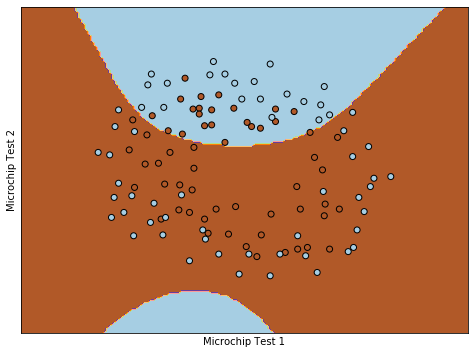

False True


In [598]:
from numpy import loadtxt, ones, zeros, where
import numpy as np
from pylab import plot,legend,show,where,scatter,xlabel, ylabel,linspace,contour,title
import matplotlib.pyplot as plt

def test_logreg2():

    polyPower = 6

    # load the data
    filepath = "http://www.seas.upenn.edu/~cis519/spring2020/data/hw3-data2.csv"
    df = pd.read_csv(filepath, header=None)

    X = df[df.columns[0:2]]
    y = df[df.columns[2]]

    n,d = X.shape

    # map features into a higher dimensional feature space
    Xaug = mapFeature(X.copy(), X.columns[0], X.columns[1], polyPower)

    # # Standardize features
    from sklearn.preprocessing import StandardScaler
    standardizer = StandardScaler()
    Xaug = pd.DataFrame(standardizer.fit_transform(Xaug))  # compute mean and stdev on training set for standardization
    
    # train logistic regression
    logregModel = LogisticRegressionAdagrad(regLambda = 0.00000001, regNorm=2, epsilon=0.00000001, maxNumIters = 10000)
    logregModel.fit(Xaug,y)
    
    # Plot the decision boundary
    h = .02  # step size in the mesh
    x_min = X[X.columns[0]].min() - .5
    x_max = X[X.columns[0]].max() + .5
    y_min = X[X.columns[1]].min() - .5
    y_max = X[X.columns[1]].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    allPoints = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()])
    allPoints = mapFeature(allPoints, allPoints.columns[0], allPoints.columns[1], polyPower)
    allPoints = pd.DataFrame(standardizer.transform(allPoints))
    Xaug = pd.DataFrame(standardizer.fit_transform(Xaug))  # standardize data
    
    Z = logregModel.predict(allPoints)
    Z = np.asmatrix(Z.to_numpy())

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot the training points
    plt.scatter(X[X.columns[0]], X[X.columns[1]], c=y.ravel(), edgecolors='k', cmap=plt.cm.Paired)
    
    # Configure the plot display
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    
    plt.savefig('')
    plt.show()


    print(str(Z.min()) + " " + str(Z.max()))

test_logreg2()

# Logistic Regression with Adagrad

In [597]:
class LogisticRegressionAdagrad:

    def __init__(self, alpha = 0.1, regLambda=0.01, regNorm=2, epsilon=0.00001, maxNumIters = 10000, initTheta = None):
        '''
        Constructor
        Arguments:
        	alpha is the learning rate
        	regLambda is the regularization parameter
        	regNorm is the type of regularization (either L1 or L2, denoted by a 1 or a 2)
        	epsilon is the convergence parameter
        	maxNumIters is the maximum number of iterations to run
          initTheta is the initial theta value. This is an optional argument
        '''
        self.alpha = alpha
        self.regLambda = regLambda
        self.regNorm = regNorm
        self.epsilon = epsilon
        self.maxNumIters = maxNumIters
        self.theta = initTheta
        self.costList = []
        self.Xi = 1e-05

    
    def computeCost(self, theta, X, y, regLambda):
        '''
        Computes the objective function
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-by-1 numpy matrix
            regLambda is the scalar regularization constant
        Returns:
            a scalar value of the cost  ** make certain you're not returning a 1 x 1 matrix! **
        '''
        d = len(X)
        h_theta = self.sigmoid(np.dot(X.reshape((1, d)), theta))
        #h_theta = np.array(h_theta)
        cost = -(np.dot(y.T, np.log(h_theta)) + np.dot((1 - y).T, np.log(1 - h_theta)))
        if self.regNorm is 1:
            regCost = regLambda * sum(abs(theta))
        if self.regNorm is 2:
            regCost = regLambda * ((np.linalg.norm(theta)) ** 2)
        return cost + regCost

    
    
    def computeGradient(self, theta, X, y, regLambda):
        '''
        Computes the gradient of the objective function
        Arguments:
            X is a n-by-d numpy matrix
            y is an n-by-1 numpy matrix
            regLambda is the scalar regularization constant
        Returns:
            the gradient, an d-dimensional vector
        '''
        #h_theta = np.array(h_theta)
        d = len(X)
        h_theta = self.sigmoid(np.dot(X.reshape((1, d)), theta))
        gradient = np.zeros((d,1))
        # compute special case, the first column with x_i0 all being 1
        gradient[0, 0] = h_theta - y # no regularization for the x_i0
        # start compute the rest of columns
        for j in range(d-1):
            if self.regNorm is 1:
                gradient[j+1, 0] = (h_theta - y) * X[j+1] + regLambda * ( theta[j+1]/ abs(theta[j+1] ) )
            if self.regNorm is 2:
                gradient[j+1, 0] = (h_theta - y) * X[j+1] + regLambda * theta[j+1]        
        return gradient
    


    def fit(self, X, y):
        '''
        Trains the model
        Arguments:
            X is a n-by-d Pandas data frame
            y is an n-by-1 Pandas data frame
        Note:
            Don't assume that X contains the x_i0 = 1 constant feature.
            Standardization should be optionally done before fit() is called.
        '''
        n = len(y)
        X = X.to_numpy()
        X = np.c_[np.ones((n, 1)), X]
        
        n, d = X.shape
        y = y.to_numpy()
        y = y.reshape(n, 1)
        
        # start doing gradient descent
        if self.theta is None:
            self.theta = np.matrix(np.zeros((d,1)))  #np.zeros(d)
        
        
        count = 0
        G = np.zeros((d, 1))
        self.alpha = np.ones((d,1)) * self.alpha
        self.costList.append((None, 100)) # assign a large dummy theta and assign None to cost as the starter 
        allData = np.c_[X, y]
        prev_theta = np.matrix(np.ones((d,1))) # initialize a dummy theta value
        for rep in range(self.maxNumIters):
            np.random.shuffle(allData)
            X = allData[:,:-1]
            y = allData[:,-1]
            for i in range(n):
                G = G + ((self.computeGradient(self.theta, X[i,:], y[i], self.regLambda)).reshape((d,1)))**2
                alpha_t = self.alpha / (np.sqrt(G) + self.Xi) 
                prev_theta = self.theta # store the previous theta values
                self.theta = self.theta - alpha_t * self.computeGradient(self.theta, X[i,:], y[i], self.regLambda)
            count = count + 1
            print('Iteration ', count, ' theta: ', self.theta.T)
            if self.hasConverged(self.theta, prev_theta):
                break
            
            


    def predict(self, X):
        '''
        Used the model to predict values for each instance in X
        Arguments:
            X is a n-by-d Pandas data frame
        Returns:
            an n-by-1 dimensional Pandas data frame of the predictions
        Note:
            Don't assume that X contains the x_i0 = 1 constant feature.
            Standardization should be optionally done before predict() is called.
        '''
        prob = self.predict_proba(X)
        label = (prob >= 0.5)
        return label

    def predict_proba(self, X):
        '''
        Used the model to predict the class probability for each instance in X
        Arguments:
            X is a n-by-d Pandas data frame
        Returns:
            an n-by-1 Pandas data frame of the class probabilities
        Note:
            Don't assume that X contains the x_i0 = 1 constant feature.
            Standardization should be optionally done before predict_proba() is called.
        '''
        n, d = X.shape
        X = X.to_numpy()
        X = np.c_[np.ones((n, 1)), X]
        prob = pd.DataFrame(self.sigmoid(np.dot(X, self.theta)))
        return prob

    def hasConverged(self, theta, prevTheta):
        running_epsilon = np.linalg.norm( self.theta - prevTheta)
        print('The convergence now is: ', running_epsilon)
        return (running_epsilon < self.epsilon)


    def sigmoid(self, Z):
        '''
        Computes the sigmoid function 1/(1+exp(-z))
        '''
        return 1/(1 + np.exp(-Z))

   